### Individual exercise: housing data

Use the housing dataset and do Exploratory Data Analysis (EDA). Use all the tools you have learned so far (making summaries with groupby, select, filter, statistical summaries, and **especially** plotting.

Try to find patterns; find a story in the data!

As with the Titanic dataset, upload your notebook to Slack, or to GitHub and share the link.

[Cleaning the Data](#Cleaning-the-Data)

[Number of Transactions and Price](#Number-of-Transactions-and-Price)

[Price Analysis by City](#Price-Analysis-by-City)

[Price Analysis by Zip Code](#Price-Analysis-by-Zip-Code)

[Average Price/Sqft by City](#Average-Price/Sqft-by-City)

[Average Price/Sqft by Zip Code](#Average-Price/Sqft-by-Zip-Code)

[Year Built](#Year-Built)

[Building Age](#Building-Age)

[Price vs Sqft](#Price-vs-Sqft)

[Condition](#Condition)

[Bedrooms](#Bedrooms)

[Floors](#Floors)

[Bedrooms](#Bedrooms)

[Bathrooms](#Bathrooms)

[Waterfront](#Waterfront)

[View](#View)

# Cleaning the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Hazal-Y/Housing-EDA-Python/main/housing_price.csv')

In [ ]:
# There are many 0 priced houses and a few very high priced properties
# which will be cleaned out and excluded from the analysis

In [ ]:
df.shape

(4600, 18)

In [ ]:
df_dropzero = df[df['price'] != 0]

In [ ]:
df_dropzero.shape

(4551, 18)

In [ ]:
df_dropzero.sort_values('price', ascending=False).head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4350,2014-07-03 00:00:00,26590000.0,3.0,2.00,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,WA 98031,USA
4346,2014-06-23 00:00:00,12899000.0,3.0,2.50,2190,11394,1.0,0,0,3,1550,640,1956,2001,5426 40th Ave W,Seattle,WA 98199,USA
2286,2014-06-11 00:00:00,7062500.0,5.0,4.50,10040,37325,2.0,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,WA 98004,USA
2654,2014-06-17 00:00:00,4668000.0,5.0,6.75,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,WA 98040,USA
2761,2014-06-18 00:00:00,4489000.0,4.0,3.00,6430,27517,2.0,0,0,3,6430,0,2001,0,1149-1199 91st Ave NE,Bellevue,WA 98004,USA


In [ ]:
# The top three properties with  thehighest values will be excluded from the analysis.

In [ ]:
# Additionally, Beaux Arts Village distorts the average price/sqft analysis since it has only one property 
# with a high average price/sqft.

In [ ]:
df['price_per_sqft']=df['price']/df['sqft_living']

In [ ]:
df.groupby(['statezip', 'city']).price_per_sqft.agg([np.mean, len]).sort_values(by='mean',ascending=False).head()

,,mean,len
statezip,city,,
WA 98004,Beaux Arts Village,500.000000,1
WA 98031,Kent,496.021944,66
WA 98039,Medina,492.127576,11
WA 98004,Yarrow Point,490.384531,4
WA 98199,Seattle,442.927238,68


In [ ]:
df[df['city'] == 'Beaux Arts Village']

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_per_sqft
1476,2014-05-28 00:00:00,745000.0,3.0,1.75,1490,9800,1.0,0,0,4,1140,350,1947,1988,10637 SE 29th St,Beaux Arts Village,WA 98004,USA,500.0


In [ ]:
df_housing = df_dropzero.drop([4350, 4346, 2286, 1476])

In [ ]:
df_housing.shape

(4547, 18)

In [ ]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4547 entries, 0 to 4599
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            4547 non-null   object        
 1   price           4547 non-null   float64       
 2   bedrooms        4547 non-null   float64       
 3   bathrooms       4547 non-null   float64       
 4   sqft_living     4547 non-null   int64         
 5   sqft_lot        4547 non-null   int64         
 6   floors          4547 non-null   float64       
 7   waterfront      4547 non-null   int64         
 8   view            4547 non-null   int64         
 9   condition       4547 non-null   int64         
 10  sqft_above      4547 non-null   int64         
 11  sqft_basement   4547 non-null   int64         
 12  yr_built        4547 non-null   int64         
 13  yr_renovated    4547 non-null   int64         
 14  street          4547 non-null   object        
 15  city

In [ ]:
df_housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price_per_sqft,age
count,4.547000e+03,4547.000000,4547.000000,4547.000000,4.547000e+03,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000
mean,5.479950e+05,3.394546,2.154552,2130.971190,1.483375e+04,1.512426,0.006378,0.234440,3.449307,1821.284583,309.686607,1970.806246,807.957994,262.459535,43.193754
std,3.554036e+05,0.904623,0.775870,948.997296,3.597809e+04,0.538559,0.079615,0.765238,0.675292,850.278644,461.140332,29.765096,979.303202,111.516469,29.765096
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,10.000000,0.000000
25%,3.260500e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,182.772222,17.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,245.398773,38.000000
75%,6.570500e+05,4.000000,2.500000,2610.000000,1.096600e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000,315.440798,63.000000
max,4.668000e+06,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,1964.196429,114.000000


# Number of Transactions and Price

In [ ]:
df_housing['new_date']=pd.to_datetime(df_housing['date'])

In [ ]:
# ASK: how to make date labels the same

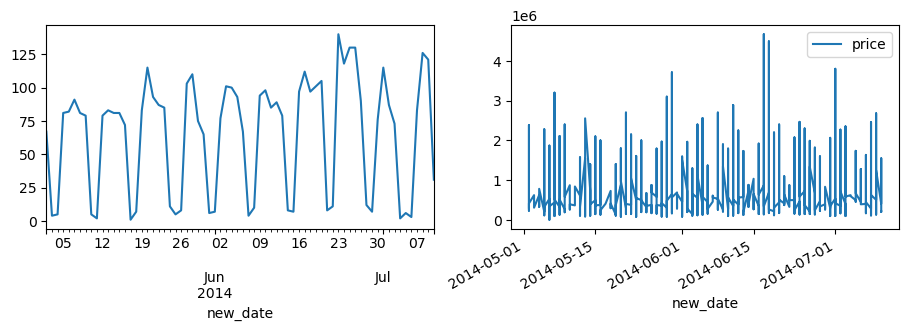

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 3))
df_housing.groupby(['new_date']).size().plot(ax=ax1)
df_housing.plot(x='new_date', y='price',ax=ax2)
plt.show()

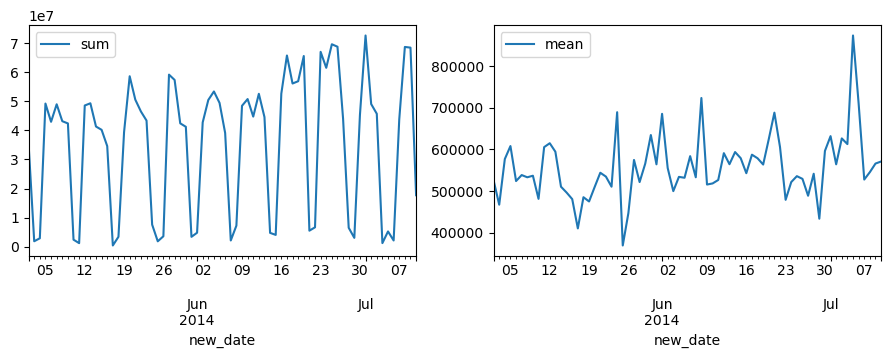

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 3))
df_housing.groupby(['new_date']).price.agg([np.sum]).plot(ax=ax1)
df_housing.groupby(['new_date']).price.agg([np.mean]).plot(ax=ax2)
plt.show()

In [ ]:
df_housing['price_per_sqft']=df_housing['price']/df_housing['sqft_living']

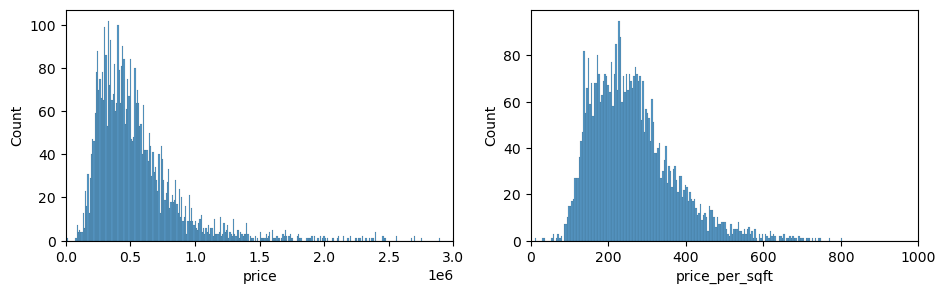

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 3))
sns.histplot(data = df_housing, x = "price", bins = 500, ax=ax1).set(xlim=(0, 3000000))
sns.histplot(data = df_housing, x = "price_per_sqft", bins = 500, ax=ax2).set(xlim=(0, 1000))
plt.show()

# Price Analysis by City

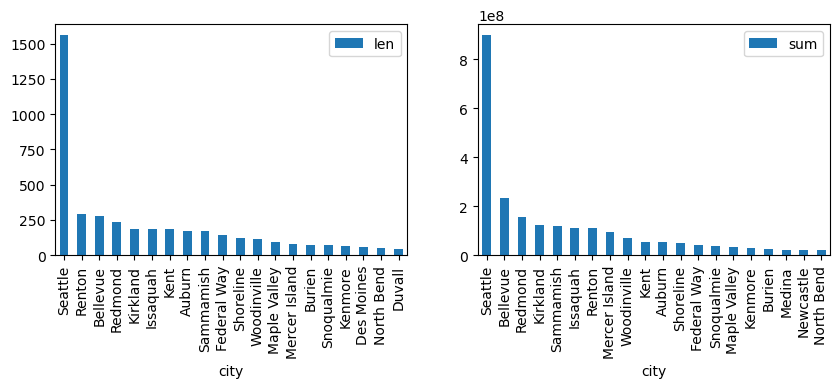

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 3))
df_housing.groupby(['city']).price.agg([len]).sort_values(by='len',ascending=False).head(20).plot.bar(stacked=False,ax=ax1)
df_housing.groupby(['city']).price.agg([sum]).sort_values(by='sum',ascending=False).head(20).plot.bar(stacked=False,ax=ax2)
plt.show()

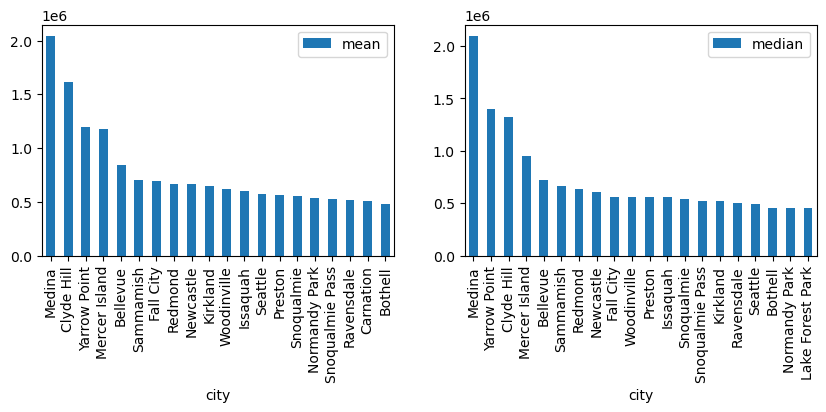

In [ ]:
fig, ((ax3, ax4)) = plt.subplots(1, 2, figsize=(10, 3))
df_housing.groupby(['city']).price.agg([np.mean]).sort_values(by='mean',ascending=False).head(20).plot.bar(stacked=False,ax=ax3)
df_housing.groupby(['city']).price.agg([np.median]).sort_values(by='median',ascending=False).head(20).plot.bar(stacked=False,ax=ax4)
plt.show()

# Price Analysis by Zip Code

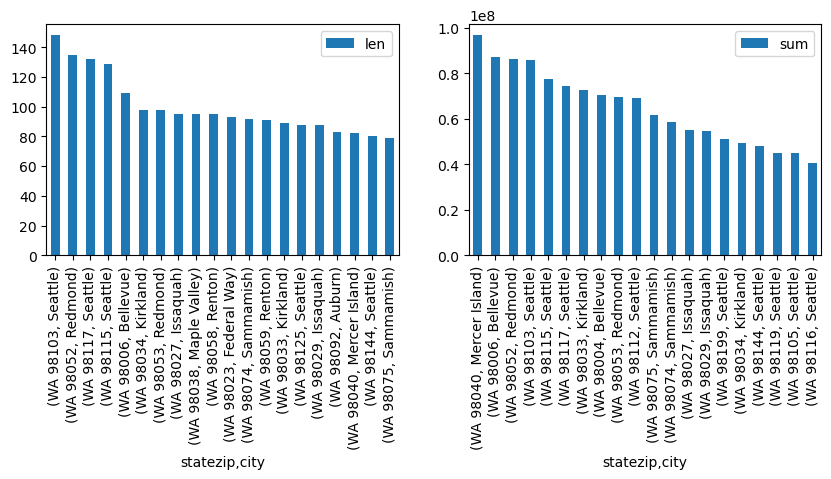

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
df_housing.groupby(['statezip', 'city']).price.agg([len]).sort_values(by='len',ascending=False).head(20).plot.bar(stacked=False,ax=ax1)
df_housing.groupby(['statezip', 'city']).price.agg([sum]).sort_values(by='sum',ascending=False).head(20).plot.bar(stacked=False,ax=ax2)
plt.show()

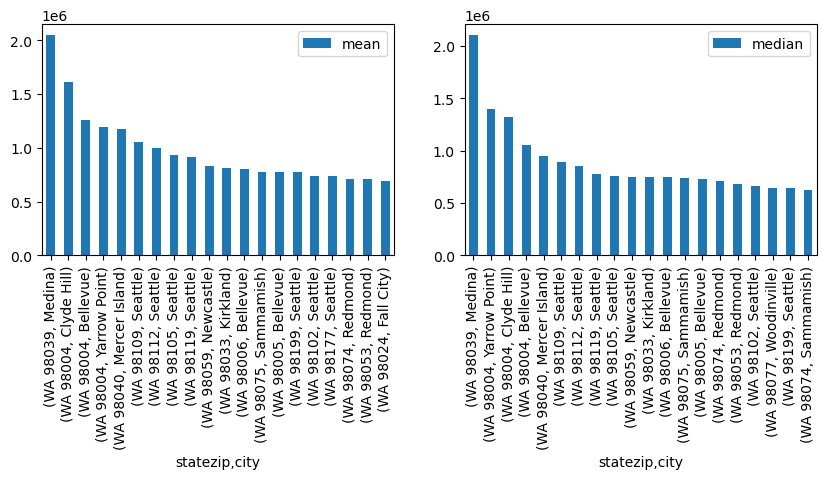

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
df_housing.groupby(['statezip', 'city']).price.agg([np.mean]).sort_values(by='mean',ascending=False).head(20).plot.bar(stacked=False,ax=ax1)
df_housing.groupby(['statezip', 'city']).price.agg([np.median]).sort_values(by='median',ascending=False).head(20).plot.bar(stacked=False,ax=ax2)
plt.show()

# Average Price/Sqft by City

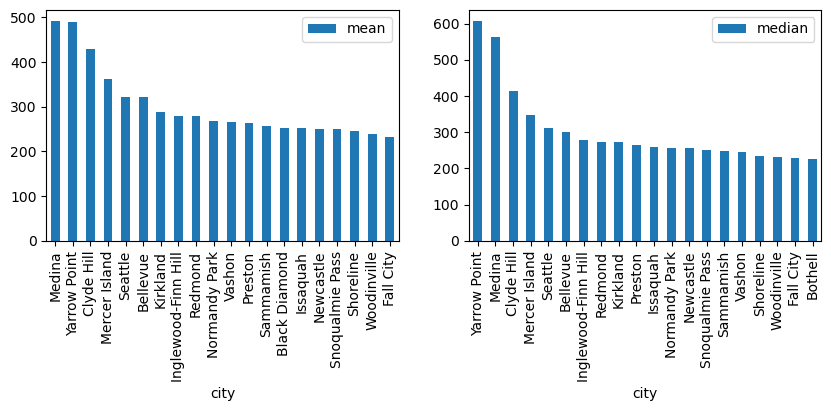

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
df_housing.groupby(['city']).price_per_sqft.agg([np.mean]).sort_values(by='mean',ascending=False).head(20).plot.bar(stacked=False,ax=ax1)
df_housing.groupby(['city']).price_per_sqft.agg([np.median]).sort_values(by='median',ascending=False).head(20).plot.bar(stacked=False,ax=ax2)
plt.show()

# Average Price/Sqft by Zip Code

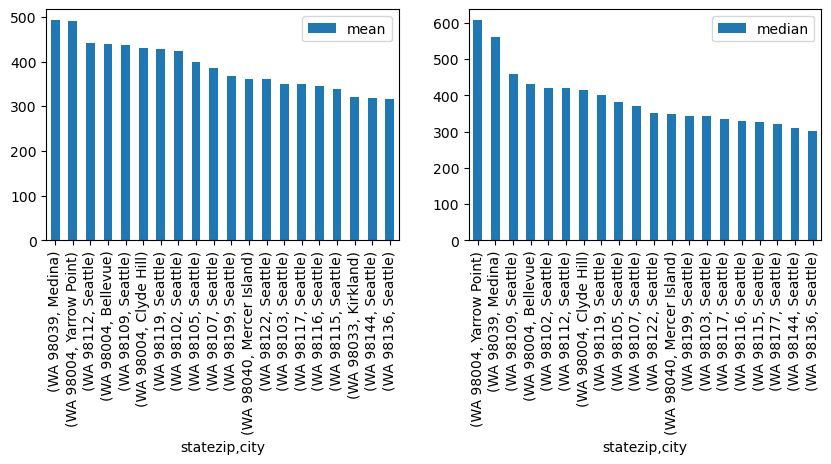

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
df_housing.groupby(['statezip', 'city']).price_per_sqft.agg([np.mean]).sort_values(by='mean',ascending=False).head(20).plot.bar(stacked=False,ax=ax1)
df_housing.groupby(['statezip', 'city']).price_per_sqft.agg([np.median]).sort_values(by='median',ascending=False).head(20).plot.bar(stacked=False,ax=ax2)
plt.show()

In [ ]:
df_housing.groupby(['statezip', 'city']).price_per_sqft.agg([np.mean, np.median, len]).sort_values(by='mean',ascending=False).head(10)

,,mean,median,len
statezip,city,,,
WA 98039,Medina,492.127576,562.165842,11
WA 98004,Yarrow Point,490.384531,607.402114,4
WA 98112,Seattle,441.045686,421.348315,69
WA 98004,Bellevue,439.475512,430.361858,56
WA 98109,Seattle,437.004488,458.210584,30
WA 98004,Clyde Hill,429.660737,414.062500,9
WA 98119,Seattle,428.893323,400.000000,49
WA 98102,Seattle,424.054224,421.698113,23
WA 98105,Seattle,399.525974,383.003761,48


# Year Built

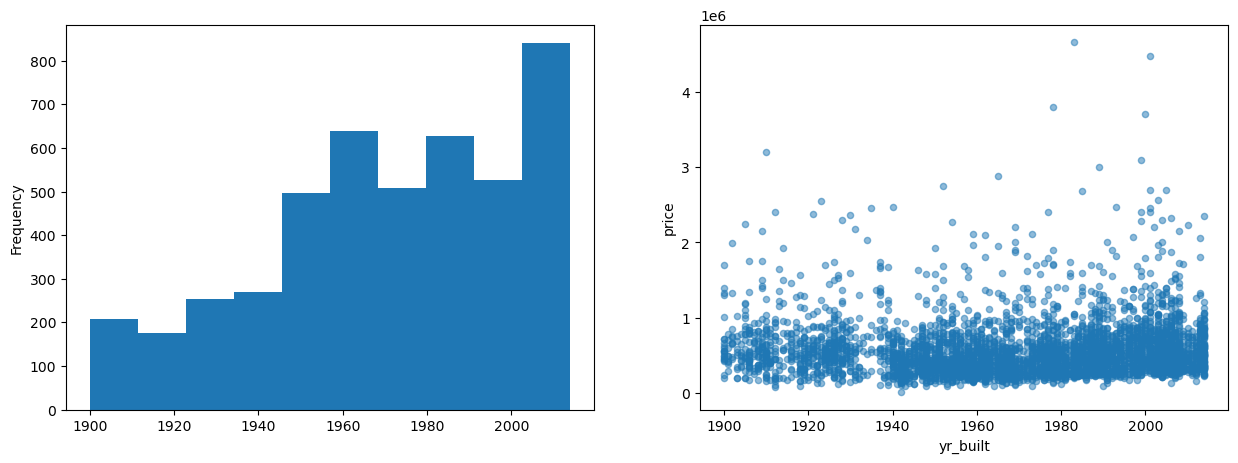

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
df_housing['yr_built'].plot(kind = 'hist', ax=ax1)
df_housing.plot.scatter('yr_built', 'price', alpha=0.5, ax=ax2)
plt.show()

# Building Age

In [ ]:
df_housing['age'] = df_housing['new_date'].dt.year - df_housing['yr_built']

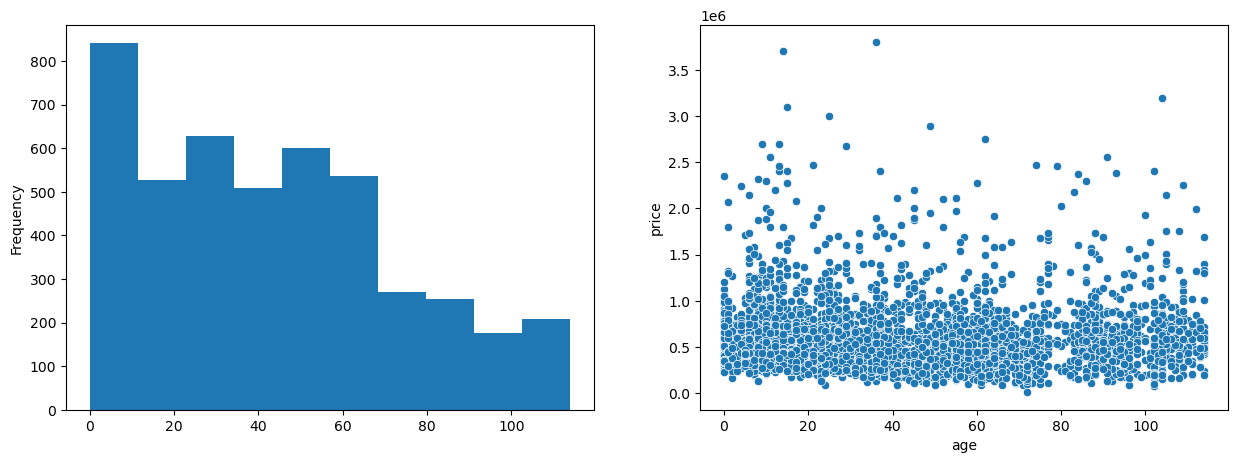

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
df_housing['age'].plot(kind='hist', ax=ax1)
sns.scatterplot(x = 'age', y = "price", 
                data = df_housing[df_housing['price'] < 4000000],
                ax=ax2)
plt.show()

# Price vs Sqft

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

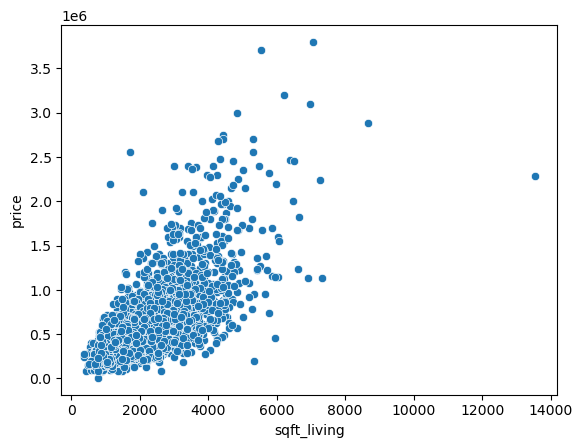

In [ ]:
sns.scatterplot(x = "sqft_living", y = "price", 
                data = df_housing[df_housing['price'] < 4000000])

In [ ]:
# ASK: how to create better looking subplots?

<AxesSubplot:xlabel='view', ylabel='Count'>

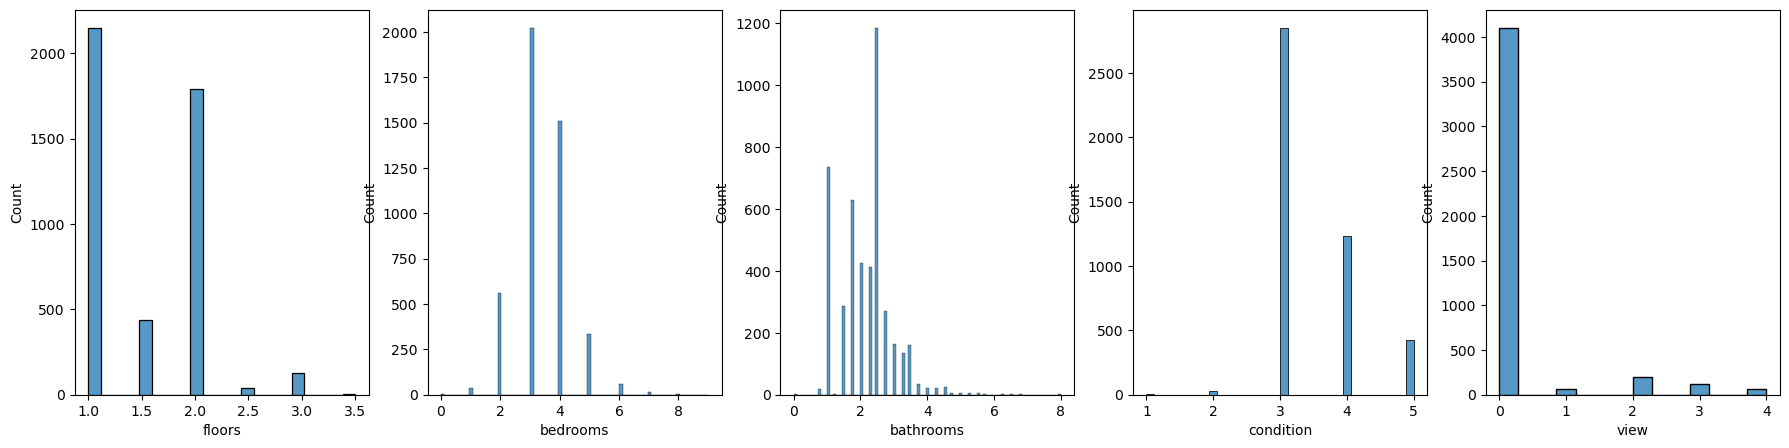

In [ ]:
fig1, ax = plt.subplots(1, 5, figsize=(22, 5))
sns.histplot(data=df_housing['floors'], ax=ax[0])
sns.histplot(data=df_housing['bedrooms'], ax=ax[1])
sns.histplot(data=df_housing['bathrooms'], ax=ax[2])
sns.histplot(data=df_housing['condition'], ax=ax[3])
sns.histplot(data=df_housing['view'], ax=ax[4])

# Condition

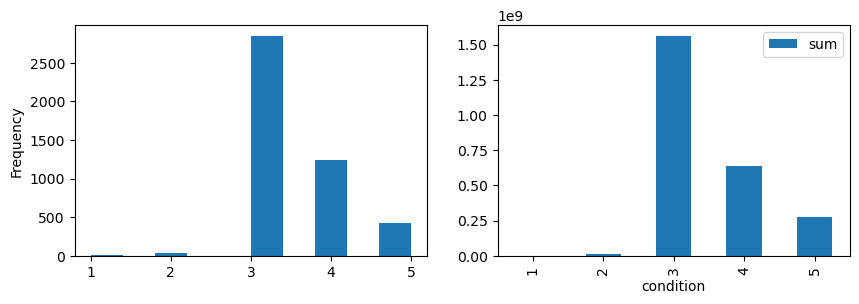

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
df_housing['condition'].plot(kind='hist', ax=ax1)
df_housing.groupby(['condition']).price.agg([np.sum]).plot.bar(ax=ax2)
plt.show()

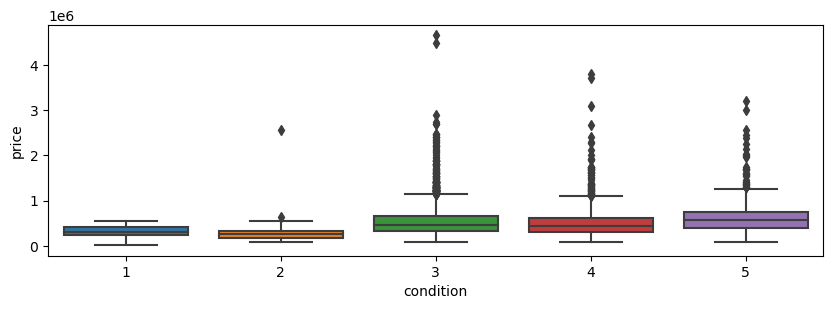

In [ ]:
plt.figure(figsize=(10, 3))
sns.boxplot(x='condition',y='price',data=df_housing)
plt.show()

# Floors

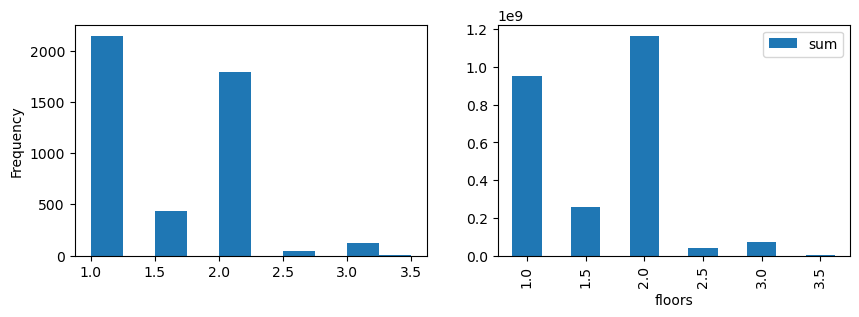

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
df_housing['floors'].plot(kind='hist', ax=ax1)
df_housing.groupby(['floors']).price.agg([np.sum]).plot.bar(ax=ax2)
plt.show()

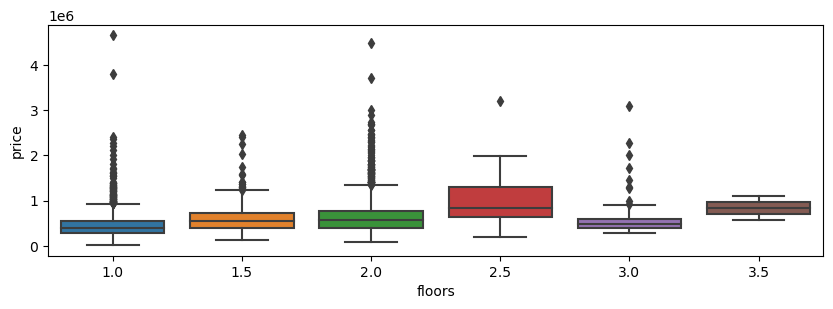

In [ ]:
plt.figure(figsize=(10, 3))
sns.boxplot(x='floors',y='price',data=df_housing)
plt.show()

# Bedrooms

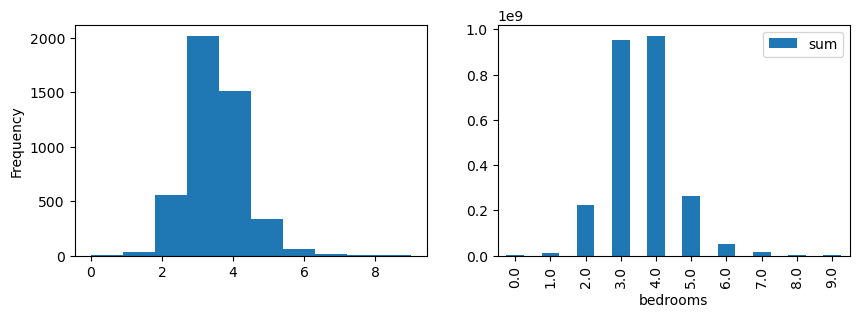

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
df_housing['bedrooms'].plot(kind='hist', ax=ax1)
df_housing.groupby(['bedrooms']).price.agg([np.sum]).plot.bar(ax=ax2)
plt.show()

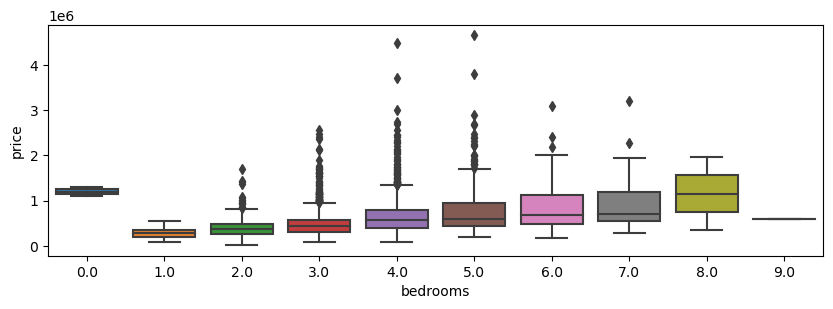

In [ ]:
plt.figure(figsize=(10, 3))
sns.boxplot(x='bedrooms',y='price',data=df_housing)
plt.show()

In [ ]:
# boxes show the average values
# check what the sizes of the boxes show
# dots are scattered values - showing the outliers

# Bathrooms

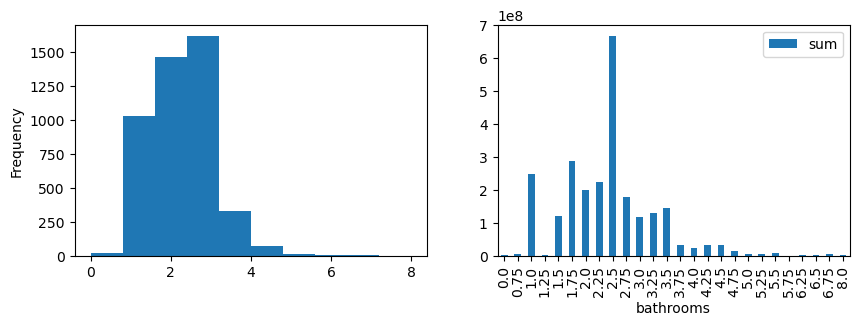

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
df_housing['bathrooms'].plot(kind='hist', ax=ax1)
df_housing.groupby(['bathrooms']).price.agg([np.sum]).plot.bar(ax=ax2)
plt.show()

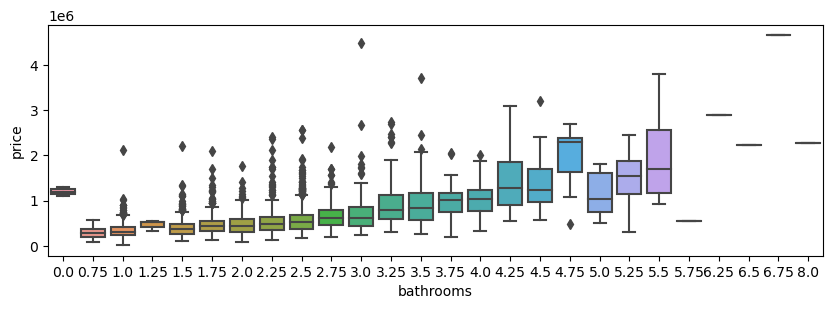

In [ ]:
plt.figure(figsize=(10, 3))
sns.boxplot(x='bathrooms',y='price',data=df_housing)
plt.show()

In [ ]:
df_housing[df_housing["bathrooms"] == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,new_date,price_per_sqft,age
2365,2014-06-12 00:00:00,1095000.0,0.0,0.0,3064,4764,3.5,0,2,3,...,0,1990,2009,814 E Howe St,Seattle,WA 98102,USA,2014-06-12,357.375979,24
3209,2014-06-24 00:00:00,1295648.0,0.0,0.0,4810,28008,2.0,0,0,3,...,0,1990,2009,20418 NE 64th Pl,Redmond,WA 98053,USA,2014-06-24,269.365489,24


# Waterfront

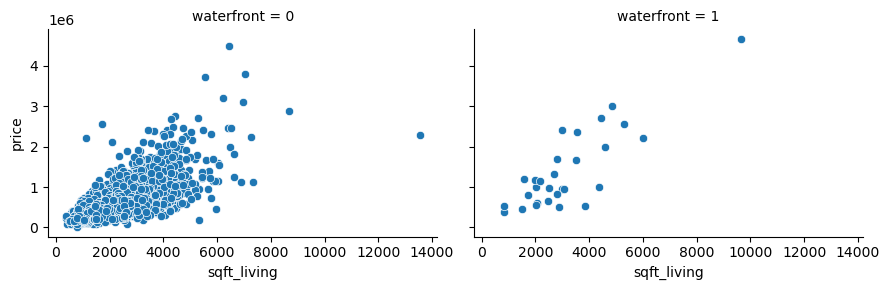

In [ ]:
sns.relplot(data = df_housing[df_housing['price'] < 5000000],
            x = "sqft_living", y = 'price',
            col = "waterfront", kind = "scatter",
            palette = "deep", height=3, aspect=1.5)

In [ ]:
# ASK: how to create a 2x3 view?

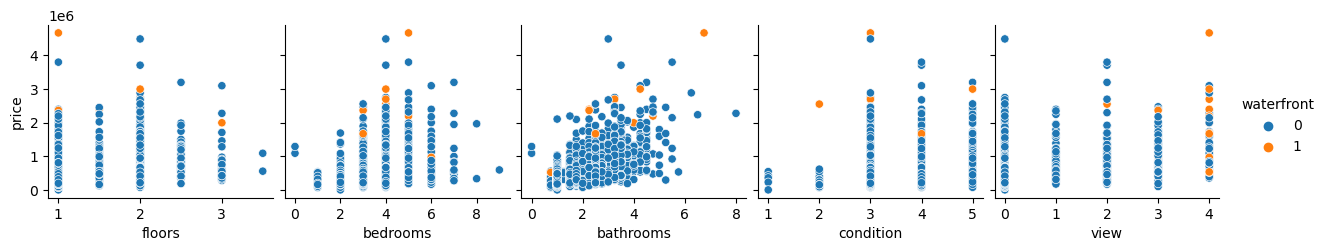

In [ ]:
sns.pairplot(data=df_housing,
x_vars=['floors', 'bedrooms', 'bathrooms', 'condition', 'view'],
y_vars=['price'], hue='waterfront')

# View

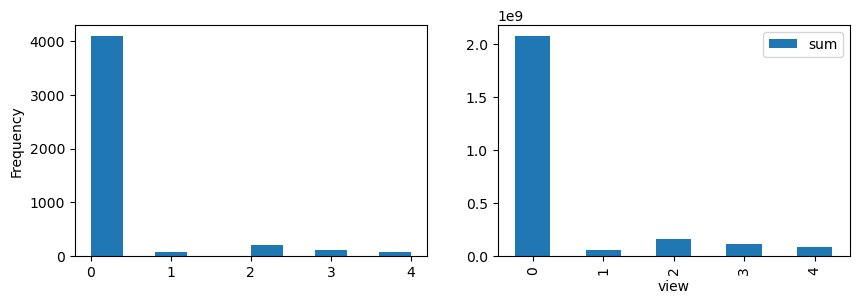

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
df_housing['view'].plot(kind='hist', ax=ax1)
df_housing.groupby(['view']).price.agg([np.sum]).plot.bar(ax=ax2)
plt.show()

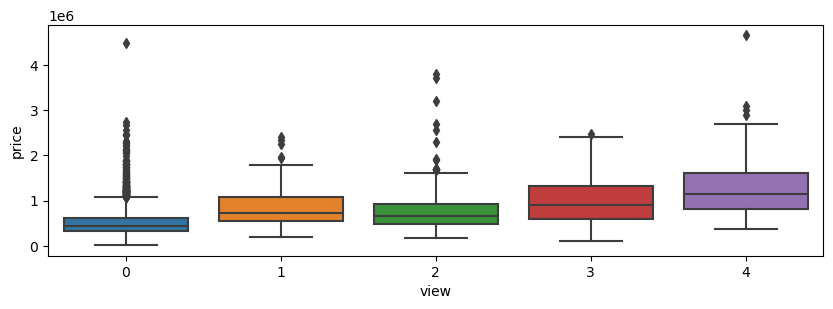

In [ ]:
plt.figure(figsize=(10, 3))
sns.boxplot(x='view',y='price',data=df_housing)
plt.show()

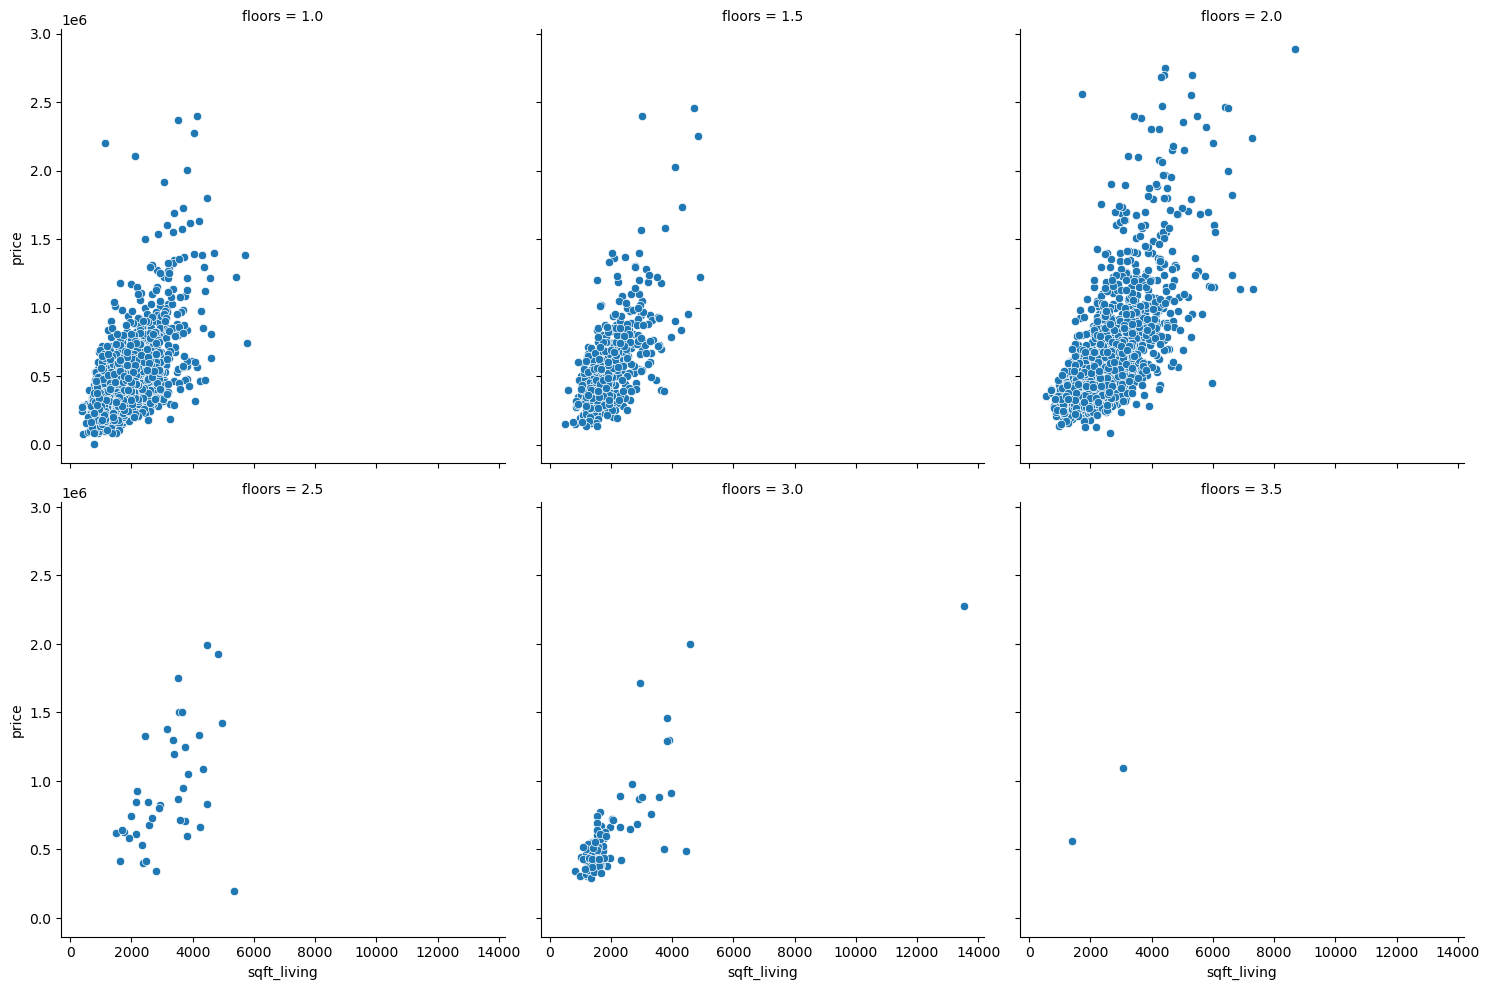

In [ ]:
sns.relplot(data = df_housing[df_housing['price'] < 3000000],
            x = "sqft_living", y = 'price',
            col = "floors", col_wrap=3, kind = "scatter",
            palette = "deep")